In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas import Series, DataFrame

In [3]:
entry = pd.read_csv("data.csv")
entry.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
entry.shape

(891, 12)

In [5]:
#we can use data.dtypes but this will provide only the datatypes of each variable we used.
#But data.info will give us full information like how many null values were present in the data.

entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


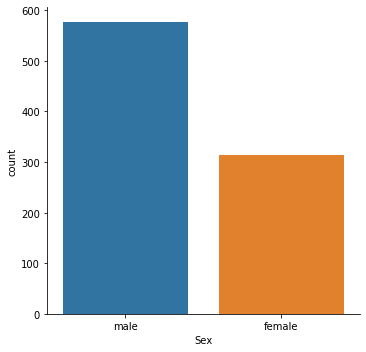

In [6]:
sns.factorplot('Sex',data = entry, kind = "count")

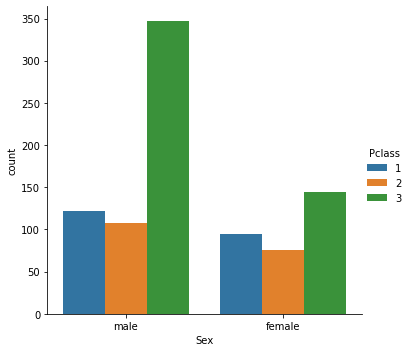

In [7]:
##hue argument is used for color encoding.

sns.factorplot('Sex', data = entry, kind = "count", hue = 'Pclass')

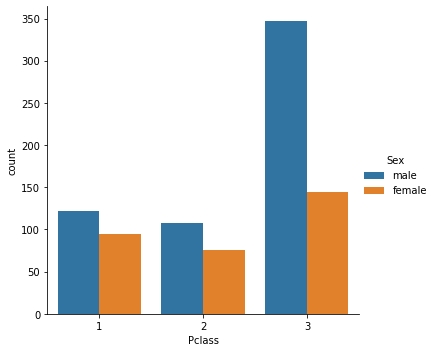

In [8]:
sns.factorplot('Pclass', data = entry, kind = "count", hue = "Sex")

By the above graph, we can literally identify which gender occupies in all the 3 classes. Based on the graph, we can say that males occupies much more than females. It will be better for prediction if we spilt between males, females and children.

In [9]:
## To find the children occupancy

def split(passenger):
    age,sex = passenger
    if age < 16:
        return 'Child'
    else:
        return sex

In [10]:
entry['Person'] = entry[['Age','Sex']].apply(split,axis = 1)

In [11]:
entry[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


Now we have split the male, female and children.

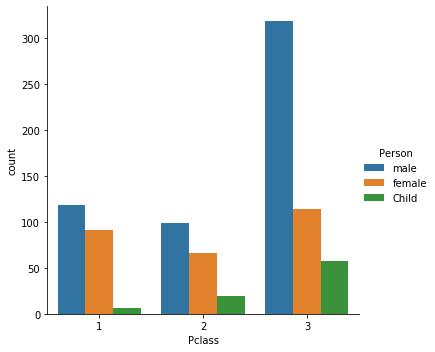

In [12]:
sns.factorplot('Pclass', data = entry, kind = "count", hue = 'Person')

While comparing the graph, there are so many children in 3rd class and not so many in 1st class.

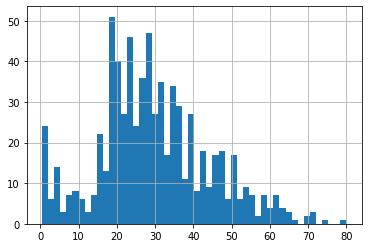

In [105]:
## bins are used to divide the dataset into given equal parts.

entry['Age'].hist(bins=50)

In [106]:
entry['Age'].mean()

29.69911764705882

In [107]:
entry['Person'].value_counts()

male      537
female    271
Child      83
Name: Person, dtype: int64

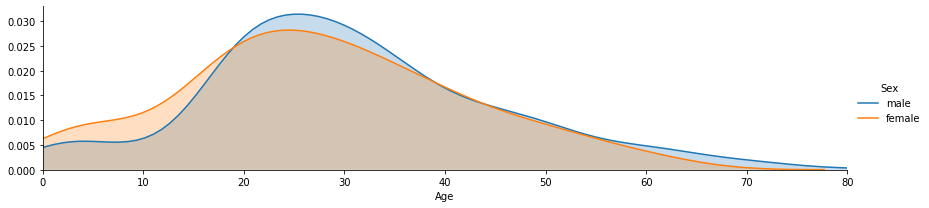

In [108]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(entry,hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = entry['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

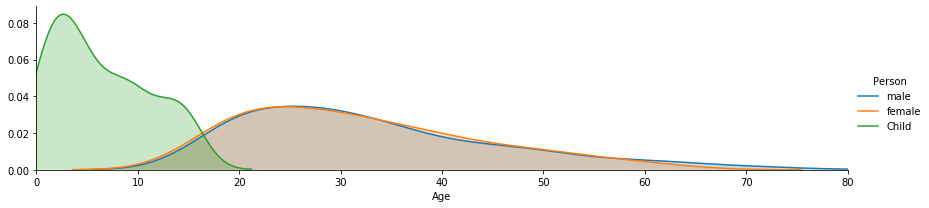

In [109]:
# Do the same process for person column to include children

fig = sns.FacetGrid(entry, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = entry['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

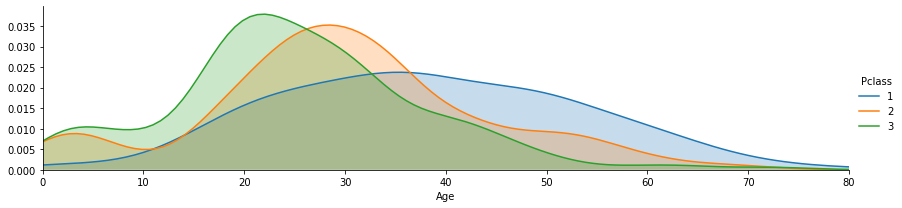

In [110]:
# To find the class use the above process

fig = sns.FacetGrid(entry, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = entry['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

In [111]:
entry.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


While looking at the dataset, we have some missing values in vabin column. So lets fix it.

In [112]:
fill = entry['Cabin'].dropna()

In [113]:
fill.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

We only need the first letter of the fill to classify its level.

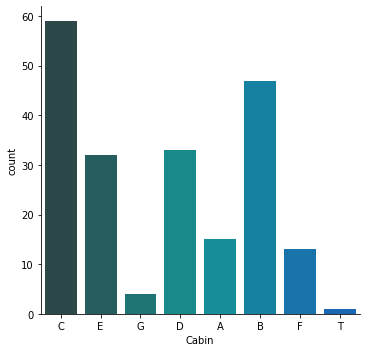

In [114]:
# So lets grab that letter for the fill level with a simple for loop
# set empty loop

levels = []

# Loop to grab first letter
for level in fill:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

From the above graph we have 'T' deck value which doesn't make any sense so we can drop it.

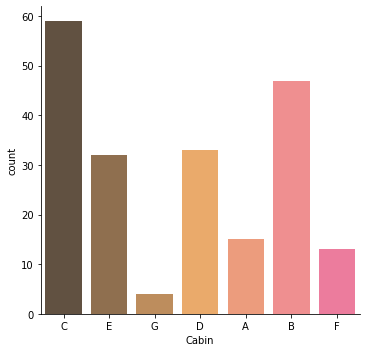

In [116]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data = cabin_df, palette = 'spring_d', kind = 'count')

We just removed the 'T' deck.

In [117]:
entry.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In embarked column we have C,Q and S values which means Cherbourg, Queenstown and Southhampton. Lets analyse which value occuring more.

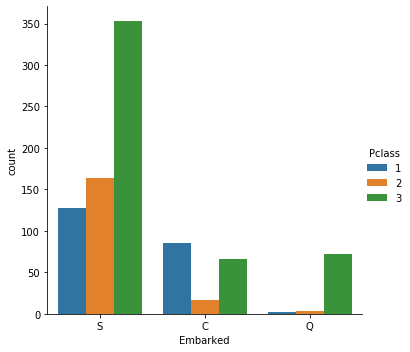

In [119]:
sns.factorplot('Embarked', data = entry, hue = 'Pclass', kind = 'count')

Through this visualization we can say that Southhampton has more number of passengers when compared to other two classes.

Lets find out how many passengers are with their family and how many passengers were alone.

In [121]:
entry['Alone'] = entry.Parch + entry.SibSp
entry['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [122]:
entry['Alone'].loc[entry['Alone'] > 0] = 'With Family'
entry['Alone'].loc[entry['Alone'] == 0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [123]:
entry.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [124]:
entry['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

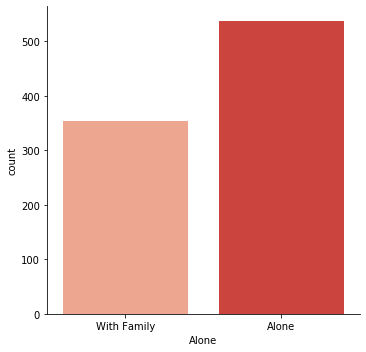

In [131]:
sns.factorplot('Alone', data = entry, palette = "Reds", kind = "count")

So we can classify, In titanic ship passengers who are alone are travelling more than that of passenger with family.

Lets calculate how many passengers where survived 

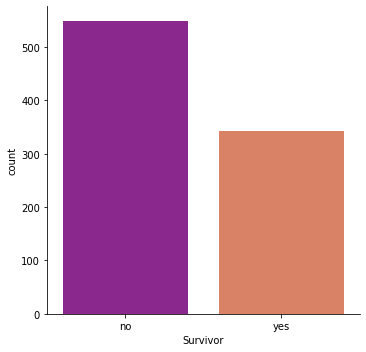

In [136]:
entry['Survivor'] = entry.Survived.map({0:'no' , 1:'yes'})
sns.factorplot('Survivor', data = entry, palette = 'plasma', kind = 'count')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate.

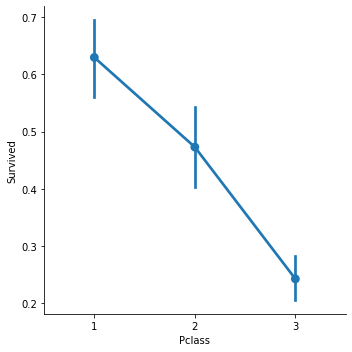

In [137]:
sns.factorplot('Pclass', 'Survived', data = entry)

By this graph, we can identify that survival rate for 3rd class is substantially low.

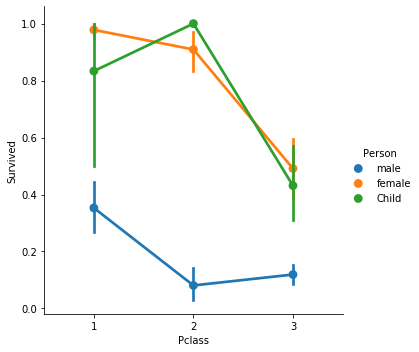

In [139]:
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = entry)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

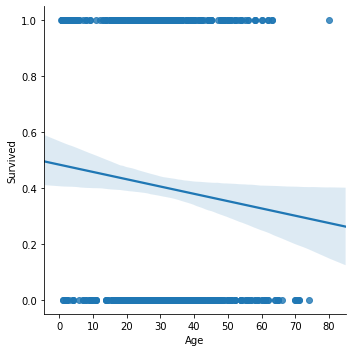

In [140]:
sns.lmplot('Age', 'Survived', data = entry)

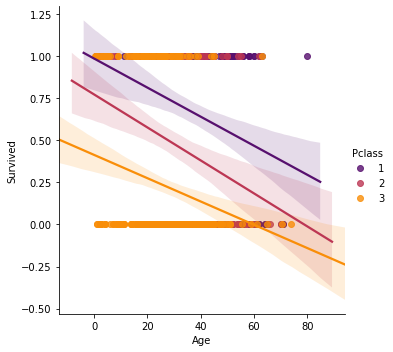

In [141]:
sns.lmplot('Age','Survived',hue='Pclass', data=entry, palette='inferno')

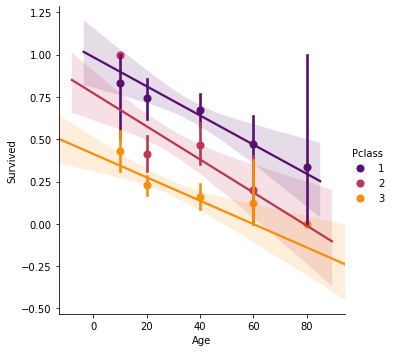

In [143]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass', data=entry, palette='inferno',x_bins=generations)

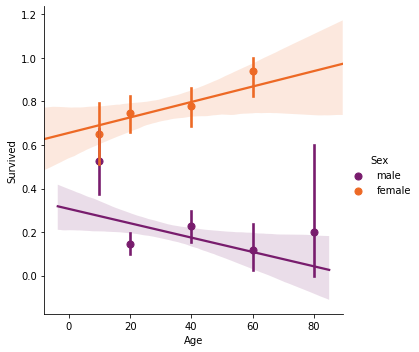

In [144]:
sns.lmplot('Age','Survived',hue='Sex', data=entry, palette='inferno',x_bins=generations)

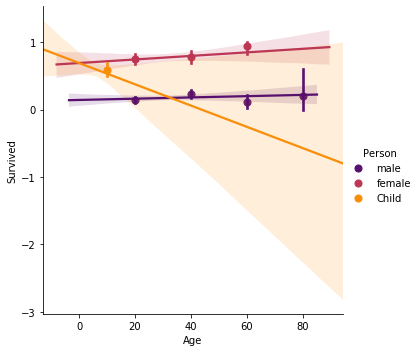

In [145]:
sns.lmplot('Age','Survived',hue='Person', data=entry, palette='inferno',x_bins=generations)

In [146]:
entry.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


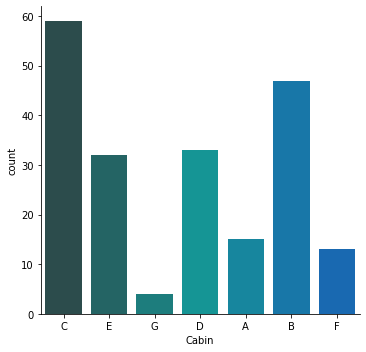

In [147]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

In [148]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [149]:
cabin_df = pd.concat([cabin_df, entry['Sex']], axis=1)

In [150]:
cabin_df = pd.concat([cabin_df, entry['Survived']], axis=1)

In [151]:
cabin_df.head()

,Cabin,Sex,Survived
0,C,male,0
1,C,female,1
2,E,female,1
3,G,female,1
4,C,male,0


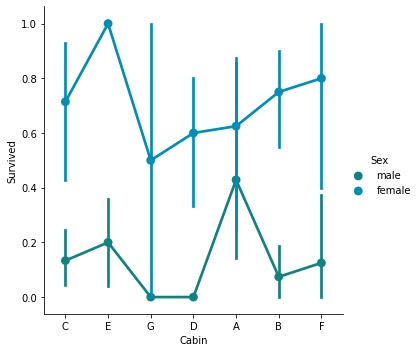

In [152]:
sns.factorplot('Cabin','Survived',data=cabin_df, hue='Sex', palette='winter_d')

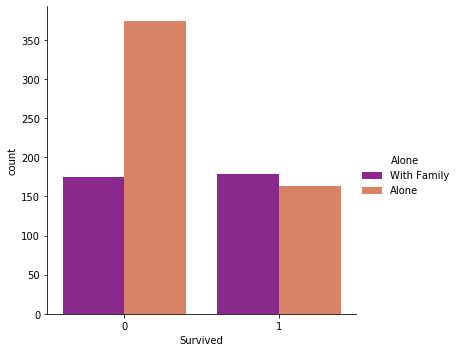

In [153]:
sns.factorplot('Survived',data=entry, hue='Alone',palette='plasma',kind='count')

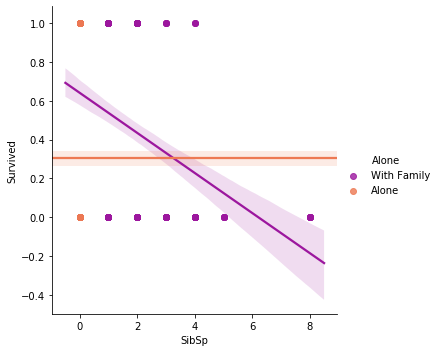

In [154]:
sns.lmplot('SibSp','Survived',data = entry, hue='Alone',palette='plasma')

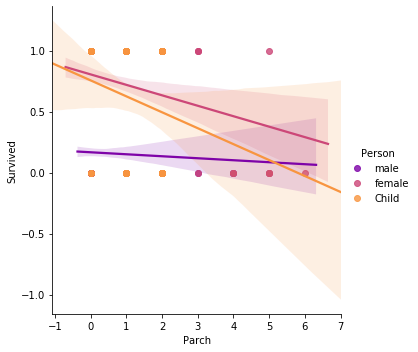

In [155]:
sns.lmplot('Parch','Survived',data = entry, hue='Person',palette='plasma')

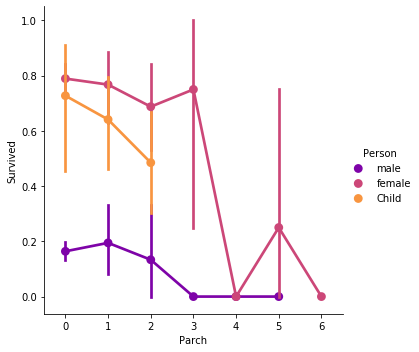

In [156]:
sns.factorplot('Parch','Survived',data = entry, hue='Person',palette='plasma')

Conclsion:
Our complete analysis mainly covered three factors in this anlysis (Age, Sex, Pclass).

Age: Doesn't play much role in determining the survival chances, except for ages below 1 years.
Sex: Women had better chances of survival than men.
In general, Women & children across all classes had higer survival rates than men.
Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate.
So we can say, that being a women in Pclass-1 seems to have the best chances of survival. However being a child or woman could not be considered as 100% survival chance.